In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import simfromcsv
import pickle

In [2]:
# stochastic BPM model
r = 5 # each infected cell produces r_i^2 virions of the ith mutant type
p = 10**-5
mu = [1, p, p**2, p**3, p**4, p**5]
mu[0] -= np.sum(mu[1:5])
g = 0.25
def BPM_st(t, g, r, mu):
    n = [1, 0, 0, 0, 0, 0]
    i = 0 # starting time
    while i < t:
        i += g
        n[0] = st.poisson.rvs(n[0]*r*mu[0])
        n[1] = st.poisson.rvs(r*(n[1]*mu[0] + n[0]*mu[1]))
        n[2] = st.poisson.rvs(r*(n[2]*mu[0] + n[1]*mu[1] + n[0]*mu[2]))
        n[3] = st.poisson.rvs(r*(n[3]*mu[0] + n[2]*mu[1] + n[1]*mu[2] + n[0]*mu[3]))
        n[4] = st.poisson.rvs(r*(n[4]*mu[0] + n[3]*mu[1] + n[2]*mu[2] + n[1]*mu[3] + n[0]*mu[4]))
        n[5] = st.poisson.rvs(r*(n[5]*mu[0] + n[4]*mu[1] + n[3]*mu[2] + n[2]*mu[3] + n[1]*mu[4] + n[0]*mu[5]))
    return n

In [3]:
#Vectorised version of the BPM
def BPM_st_vectorised(t, g, r, mu, initial_v):
    n_list = [[initial_v, 0, 0, 0, 0, 0]]
    i = 0 # starting time
    count=0 #index
    while (i <= t - g):
        i += g
        n = np.copy(n_list[count])
        n_new = np.zeros(6)
        n_new[0] = st.poisson.rvs(n[0]*r[count]*mu[0])
        n_new[1] = st.poisson.rvs(r[count]*(n[1]*mu[0])) +  st.poisson.rvs(r[count] * (n[0]*mu[1]))
        n_new[2] = st.poisson.rvs(r[count]*(n[2]*mu[0])) +  st.poisson.rvs(r[count] * ( n[1]*mu[1] )) +  st.poisson.rvs(r[count] * ( n[0]*mu[2]))
        n_new[3] = st.poisson.rvs(r[count]*(n[3]*mu[0] )) +  st.poisson.rvs(r[count] * ( n[2]*mu[1] )) +  st.poisson.rvs(r[count] * ( n[1]*mu[2] )) +  st.poisson.rvs(r[count] * ( n[0]*mu[3]))
        n_new[4] = st.poisson.rvs(r[count]*(n[4]*mu[0] )) +  st.poisson.rvs(r[count] * ( n[3]*mu[1] )) +  st.poisson.rvs(r[count] * ( n[2]*mu[2] )) +  st.poisson.rvs(r[count] * ( n[1]*mu[3] )) +  st.poisson.rvs(r[count] * ( n[0]*mu[4]))
        n_new[5] = st.poisson.rvs(r[count]*(n[5]*mu[0] )) +  st.poisson.rvs(r[count] * ( n[4]*mu[1] )) +  st.poisson.rvs(r[count] * ( n[3]*mu[2] )) +  st.poisson.rvs(r[count] * ( n[2]*mu[3] )) +  st.poisson.rvs(r[count] * ( n[1]*mu[4] )) +  st.poisson.rvs(r[count] * ( n[0]*mu[5]))
        count +=1
        n_list.append(np.copy(n_new))
        #stores the virion counts at every time point
    return n_list

In [4]:
#Get the r and lifespan parameters
g = 0.5 / 2
params = simfromcsv.getBPMparams(g,0.2)
Lifespans = params[0]
r_vals = params[1]
Deaths = params[2]

np.savetxt('Results/Lifespans_lower_mortality.csv',Lifespans,delimiter=',')
np.savetxt('Results/r_vals_lower_mortality.csv',r_vals,delimiter=',')
np.savetxt('Results/Deaths_lower_mortality.csv',Deaths,delimiter=',')

145.35758592462727


In [5]:
# Alternatively load corresponding csv files in
Lifespans = np.genfromtxt('Results/Lifespans_lower_mortality.csv',delimiter=',')
r_vals = np.genfromtxt('Results/r_vals_lower_mortality.csv',delimiter=',')
Deaths = np.genfromtxt('Results/Deaths_lower_mortality.csv',delimiter=',')

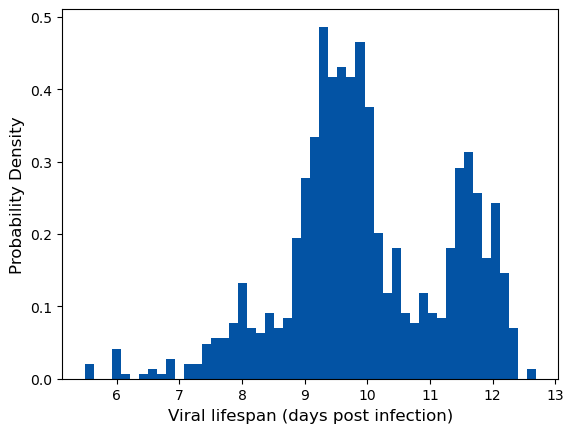

In [6]:
#Set up plot
fig, ax = plt.subplots()

#Plot a histogram of lifespans
ax.hist(Lifespans,bins=50,density=True,color="#0353A4")
ax.set_ylabel("Probability Density",fontsize=12)
ax.set_xlabel("Viral lifespan (days post infection)",fontsize=12)
plt.savefig('Plots/Lifespans_lower_mort.pdf', dpi=2400,bbox_inches='tight')
plt.show()

In [7]:
#Set parameters
p = 10**-5
mu = [1, p, p**2, p**3, p**4, p**5]
mu[0] -= np.sum(mu[1:])
initial_viral_load = 1e6

#Number of people (in 1000s)
numberpeople1000s = 1000

In [8]:
#THIS CODE WILL TAKE 2.5 HOURS TO RUN
#DO NOT RUN THIS CODE IF YOU HAVE THE PICKLE FILE SAVE ALREADY CONTAINING ITS RESULT


#Initialise lists
ns = []
n_i_lists = []

#Loop through and do a BPM for each person
for i in range(0,len(Lifespans)):
    print(str((i + 1) / len(Lifespans) * 100 ) + "%")
    for j in range(0, numberpeople1000s):
        t = Lifespans[i]
        #t = 7
        r = r_vals[i]
        #r = np.ones(120) * 2

        out = np.array(BPM_st_vectorised(t,g,r,mu,initial_viral_load))
        ns.append(np.sum(out))
        ni_list = []
        for k in range(0, 6):
            ni_list.append(out[:,k])
        n_i_lists.append(ni_list)

0.1%
0.2%
0.3%
0.4%
0.5%
0.6%
0.7000000000000001%
0.8%
0.8999999999999999%
1.0%
1.0999999999999999%
1.2%
1.3%
1.4000000000000001%
1.5%
1.6%
1.7000000000000002%
1.7999999999999998%
1.9%
2.0%
2.1%
2.1999999999999997%
2.3%
2.4%
2.5%
2.6%
2.7%
2.8000000000000003%
2.9000000000000004%
3.0%
3.1%
3.2%
3.3000000000000003%
3.4000000000000004%
3.5000000000000004%
3.5999999999999996%
3.6999999999999997%
3.8%
3.9%
4.0%
4.1000000000000005%
4.2%
4.3%
4.3999999999999995%
4.5%
4.6%
4.7%
4.8%
4.9%
5.0%
5.1%
5.2%
5.3%
5.4%
5.5%
5.6000000000000005%
5.7%
5.800000000000001%
5.8999999999999995%
6.0%
6.1%
6.2%
6.3%
6.4%
6.5%
6.6000000000000005%
6.7%
6.800000000000001%
6.9%
7.000000000000001%
7.1%
7.199999999999999%
7.3%
7.3999999999999995%
7.5%
7.6%
7.7%
7.8%
7.9%
8.0%
8.1%
8.200000000000001%
8.3%
8.4%
8.5%
8.6%
8.7%
8.799999999999999%
8.9%
9.0%
9.1%
9.2%
9.3%
9.4%
9.5%
9.6%
9.700000000000001%
9.8%
9.9%
10.0%
10.100000000000001%
10.2%
10.299999999999999%
10.4%
10.5%
10.6%
10.7%
10.8%
10.9%
11.0%
11.1%
11.2000

In [ ]:
#DO NOT RUN THIS BLOCK IF YOU DO NOT HAVE THE PICKLE FILE
#IMPORTS PICKLE FILE INSTEAD OF ABOVE CALCULATION

with open('n_list_lower_mort.pkl', 'rb') as f:

    loaded_n_list = pickle.load(f) # deserialize using load()
f.close()

n_i_lists = loaded_n_list

In [9]:
#READS VALUES TO PICKLE FILE
#BE AWARE THAT THIS FILE WILL BE VERY LARGE (2.5 GB)

with open('n_list_lower_mort.pkl', 'wb') as f:  # open a text file
    pickle.dump(n_i_lists, f) # serialize the list   
f.close()

In [12]:
13/0.25

52.0

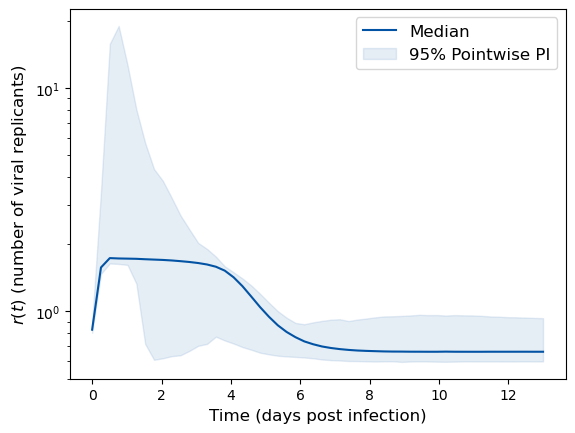

In [14]:
#Plot the median of r over time, with a 95% confidence interval
x = np.linspace(0, 13, 52)
y = np.zeros(52)
ci_u = np.zeros(52)
ci_l = np.zeros(52)
for i in range(0, 52):
    r_i = []
    for j in range(1000):
        r_i.append(r_vals[j][i])
    #calculate median and confidence interval at this time point
    y[i] = np.median(np.array(r_i))
    ci_u[i] = np.percentile(np.array(r_i), 97.5)
    ci_l[i] = np.percentile(np.array(r_i), 2.5)


fig, ax = plt.subplots()
ax.semilogy(x,y, label = 'Median',color='#0353A4')
ax.fill_between(x, (ci_l), (ci_u), color='#0353A4', alpha=.1, label="95% Pointwise PI")
ax.legend(fontsize=12)
plt.ylabel(r'$r(t)$ (number of viral replicants)',fontsize=12)
plt.xlabel('Time (days post infection)',fontsize=12)
plt.savefig('Plots/r_CI_lower_mort.pdf', dpi=2400,bbox_inches='tight')
plt.show()

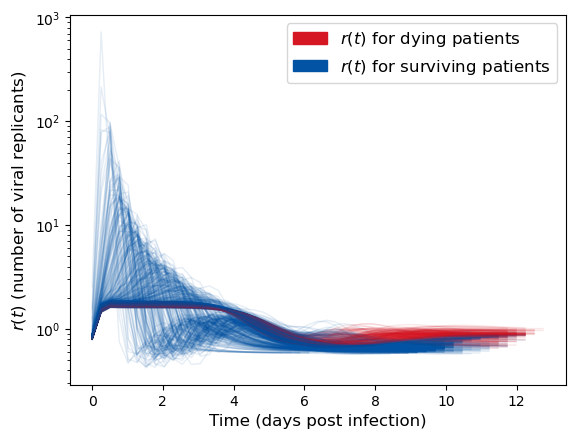

In [15]:
import matplotlib.patches as mpatches

for j in range(1000):
    L = Lifespans[j]
    gens = int(L / g) + 1
    r_curve = r_vals[j]
    if Deaths[j]:
        plt.semilogy(x[0:gens], r_curve[0:gens], '#D51623', linewidth=1, alpha = 0.1)
    else:
        plt.semilogy(x[0:gens], r_curve[0:gens], '#0353A4', linewidth=1, alpha = 0.1)


red_patch = mpatches.Patch(color='#D51623', label=r'$r(t)$ for dying patients')
blue_patch = mpatches.Patch(color='#0353A4', label=r'$r(t)$ for surviving patients')

plt.legend(handles=[red_patch, blue_patch],fontsize=12)
plt.ylabel(r'$r(t)$ (number of viral replicants)',fontsize=12)
plt.xlabel('Time (days post infection)',fontsize=12)
plt.savefig('Plots/r_surv_death_lower_mort.pdf', dpi=2400,bbox_inches='tight')

plt.show()

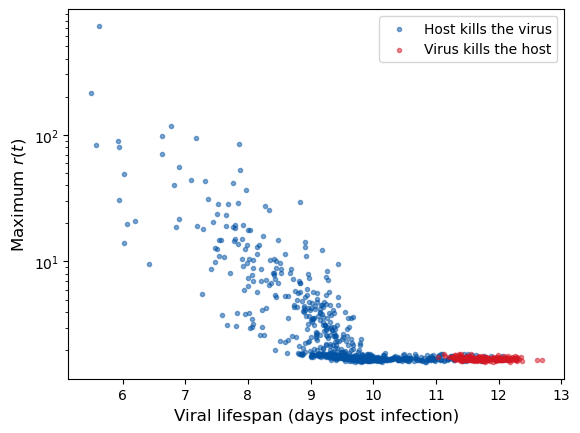

In [16]:
#Plot max r value vs lifespan
ma = []
for i in range(0,len(Lifespans)):
    ma.append(max(r_vals[i]))


dead_lifespans = []
ma_dead = []

end_of_infection = []
ma_end = []

for i in range(0,len(Lifespans)):
    if Deaths[i]:
        dead_lifespans.append(Lifespans[i])
        ma_dead.append(ma[i])
        #ma_dead.append(np.log(np.log(ma[i])))

    else:
        end_of_infection.append(Lifespans[i])
        ma_end.append(ma[i])
        #ma_end.append(np.log(np.log(ma[i])))



fig, ax = plt.subplots()
ax.scatter(end_of_infection, ma_end, c='#0353A4', label='Host kills the virus', marker=".", alpha = 0.5)
ax.scatter(dead_lifespans, ma_dead, c='#D51623', label='Virus kills the host', marker=".", alpha = 0.5)


#ax.set_yscale('linear')
ax.set_yscale('log')

plt.legend()
#plt.ylabel('Maximum loglog(r) value')
plt.ylabel(r'Maximum $r(t)$',fontsize=12)
plt.xlabel('Viral lifespan (days post infection)',fontsize=12)
plt.savefig('Plots/max_r_lower_mort.pdf', dpi=2400,bbox_inches='tight')
plt.show()

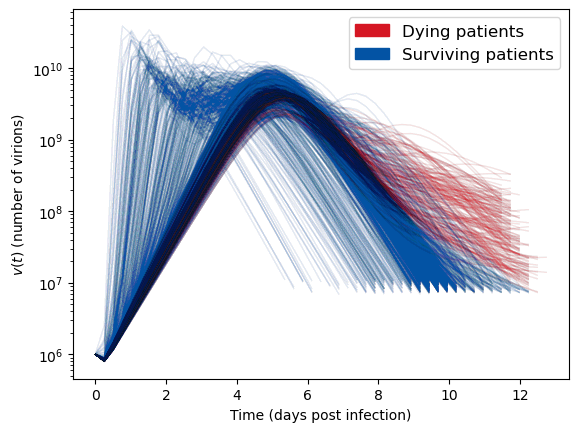

In [17]:
import matplotlib.patches as mpatches

for j in range(1000):
    for k in range(0,10):
        Vcurve = n_i_lists[k + numberpeople1000s * j][0]
        if Deaths[j]:
            plt.semilogy(x[0:len(Vcurve)], Vcurve, '#D51623', linewidth=1, alpha = 0.01)
        else:
            plt.semilogy(x[0:len(Vcurve)], Vcurve, '#0353A4', linewidth=1, alpha = 0.01)


red_patch = mpatches.Patch(color='#D51623', label='Dying patients')
blue_patch = mpatches.Patch(color='#0353A4', label='Surviving patients')

plt.legend(handles=[red_patch, blue_patch],fontsize=12)
plt.ylabel(r'$v(t)$ (number of virions)')
plt.xlabel('Time (days post infection)')
plt.savefig('Plots/v_bpm_surv_dead_lower_mort.pdf', dpi=2400,bbox_inches='tight')
plt.show()

/tmp/ipykernel_854146/2926329263.py:19: RuntimeWarning: invalid value encountered in divide
  prop = n_totals[i,:] / N_TOTAL


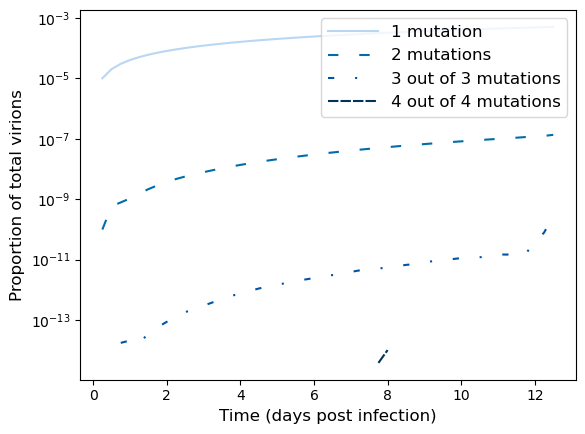

In [22]:
#We calculate the totals of each type of virion
n_totals = np.zeros((6,53))
for i in range(0,1000 * numberpeople1000s):
    for j in range(0,6):
        n_totals[j,0:len(n_i_lists[i][j])] += n_i_lists[i][j]
N_TOTAL = np.sum(n_totals, axis = 0)

#set up time values
timevals = np.linspace(0,13,53)

#set up colors for the plot
plotcolors = ['#B9D6F2', '#006DAA', '#0353A4', '#003559','#061A40']
linestyles = ['solid',(0,(5,10)),(0,(3,10,1,10)),(0,(5,1)),(0, (3, 1, 1, 1, 1, 1))]
#Set up plot
fig, ax = plt.subplots()

#We plot the proportions of each virion type over time
for i in range(1,6):
    prop = n_totals[i,:] / N_TOTAL
    myrange = np.where(prop>0)
    #create a label
    if i > 2:
        mylabel = str(i) + " out of " + str(i) + " mutations"
    else:
        if i > 1:
            mylabel = "2 mutations"
        else:
            mylabel = "1 mutation"
    if len(myrange[0]) > 0:
        ax.semilogy(timevals[myrange], prop[myrange], label = mylabel,color=plotcolors[i-1],linestyle=linestyles[i-1])
ax.legend(loc=1,fontsize=12,handlelength=3)
plt.ylabel('Proportion of total virions',fontsize=12)
plt.xlabel('Time (days post infection)',fontsize=12)
plt.savefig('Plots/prop_standard_lower_mort.pdf', dpi=2400,bbox_inches='tight')
plt.show()

/tmp/ipykernel_854146/1966554917.py:23: RuntimeWarning: Mean of empty slice
  meanV[i] = np.nanmean(np.array(v_i))
/tmp/ipykernel_854146/1966554917.py:40: RuntimeWarning: invalid value encountered in divide
  prop = n_totals[i,:] / N_TOTAL


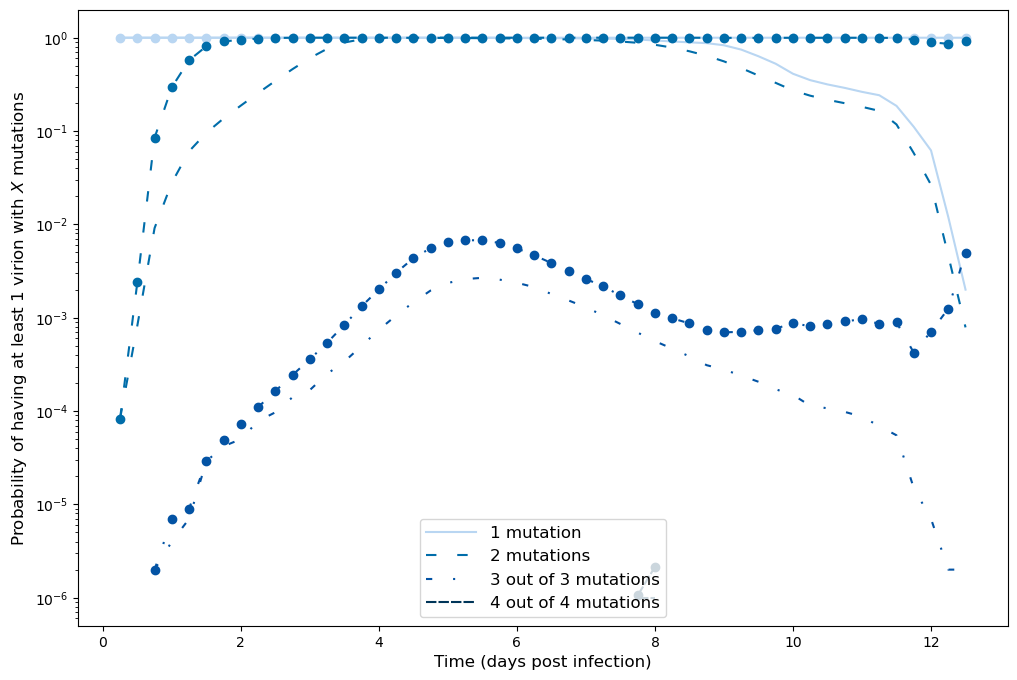

In [23]:
# We calculate the proportion / probability of an individual having at least one of a virion type
n_totals_prob = np.zeros((5,53))
for i in range(0,1000 * numberpeople1000s):
    for j in range(1,6):
        myN = n_i_lists[i][j]
        if np.max(myN) > 0.5:
            myrange = np.where(myN>0)
            n_totals_prob[j-1,myrange] += 1
n_totals_prob = n_totals_prob / (1000 * numberpeople1000s)



meanV = np.zeros(53)
for i in range(0, 53):
    v_i = []
    for j in range(1000):
        for k in range(0,numberpeople1000s):
            L = Lifespans[j]
            gens = int(L / g)
            if i <= gens:
                v_i.append(n_i_lists[k + numberpeople1000s * j][0][i])
    #calculate mean
    meanV[i] = np.nanmean(np.array(v_i))

#set up colors for the plot
plotcolors = ['#B9D6F2', '#006DAA', '#0353A4', '#003559','#061A40']
linestyles = ['solid',(0,(5,10)),(0,(3,10,1,10)),(0,(5,1)),(0, (3, 1, 1, 1, 1, 1))]

#Set up plot
fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(8)

for i in range(1,6):
    probs = n_totals_prob[i-1,:]
    myrange = np.where(probs>0)


    #make an estimate for the probability
    prop = n_totals[i,:] / N_TOTAL
    myrange = np.where(prop>0)
    probest = 1 - np.power((1 - prop[myrange]),meanV[myrange])

    #create our label
    if i > 2:
        mylabel = str(i) + " out of " + str(i) + " mutations"
    else:
        if i > 1:
            mylabel = "2 mutations"
        else:
            mylabel = "1 mutation"
    if len(myrange[0]) > 0:
        ax.semilogy(timevals[myrange], probs[myrange], color = plotcolors[i-1],linestyle=linestyles[i-1],label = mylabel)
        ax.semilogy(timevals[myrange], probest, linestyle=linestyles[i-1],marker='o',color = plotcolors[i-1])


ax.legend(loc='lower center',fontsize=12,handlelength=3)
ax.set_ylabel(r'Probability of having at least 1 virion with $X$ mutations',fontsize=12)
ax.set_xlabel('Time (days post infection)',fontsize=12)
plt.savefig('Plots/prob_standard_1_lower_mort.pdf', dpi=2400,bbox_inches='tight')
plt.show()

In [24]:
#Set parameters
p = 10**-5
mu = [1, p, p**2, p**3, p**4, p**5]
mu[0] -= np.sum(mu[1:])
initial_viral_load = 1e6

#Number of people (in 1000s)
numberpeople1000s_quick = 1e7

#Initialise lists
n_i_lists_quick = []

#Loop through and do a BPM for each person
for i in range(0,len(Lifespans)):
    print(str((i + 1) / len(Lifespans) * 100 ) + "%")
    t = Lifespans[i]
    #t = 7
    r = r_vals[i]
    #r = np.ones(120) * 2

    out = np.array(BPM_st_vectorised(t,g,r,mu,initial_viral_load * numberpeople1000s_quick))
    ni_list = []
    for k in range(0, 6):
        ni_list.append(out[:,k])
    n_i_lists_quick.append(ni_list)



0.1%
0.2%
0.3%
0.4%
0.5%
0.6%
0.7000000000000001%
0.8%
0.8999999999999999%
1.0%
1.0999999999999999%
1.2%
1.3%
1.4000000000000001%
1.5%
1.6%
1.7000000000000002%
1.7999999999999998%
1.9%
2.0%
2.1%
2.1999999999999997%
2.3%
2.4%
2.5%
2.6%
2.7%
2.8000000000000003%
2.9000000000000004%
3.0%
3.1%
3.2%
3.3000000000000003%
3.4000000000000004%
3.5000000000000004%
3.5999999999999996%
3.6999999999999997%
3.8%
3.9%
4.0%
4.1000000000000005%
4.2%
4.3%
4.3999999999999995%
4.5%
4.6%
4.7%
4.8%
4.9%
5.0%
5.1%
5.2%
5.3%
5.4%
5.5%
5.6000000000000005%
5.7%
5.800000000000001%
5.8999999999999995%
6.0%
6.1%
6.2%
6.3%
6.4%
6.5%
6.6000000000000005%
6.7%
6.800000000000001%
6.9%
7.000000000000001%
7.1%
7.199999999999999%
7.3%
7.3999999999999995%
7.5%
7.6%
7.7%
7.8%
7.9%
8.0%
8.1%
8.200000000000001%
8.3%
8.4%
8.5%
8.6%
8.7%
8.799999999999999%
8.9%
9.0%
9.1%
9.2%
9.3%
9.4%
9.5%
9.6%
9.700000000000001%
9.8%
9.9%
10.0%
10.100000000000001%
10.2%
10.299999999999999%
10.4%
10.5%
10.6%
10.7%
10.8%
10.9%
11.0%
11.1%
11.2000

/tmp/ipykernel_854146/1787346107.py:20: RuntimeWarning: invalid value encountered in divide
  prop = n_totals[i,:] / N_TOTAL


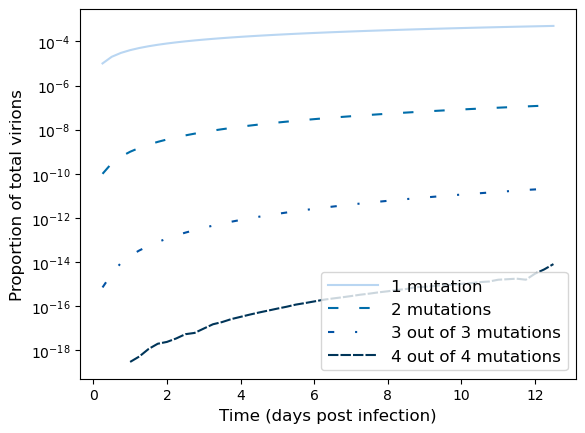

In [26]:
#We calculate the totals of each type of virion
n_totals = np.zeros((6,53))
for i in range(0,1000):
    for j in range(0,6):
        n_totals[j,0:len(n_i_lists_quick[i][j])] += n_i_lists_quick[i][j]
N_TOTAL = np.sum(n_totals, axis = 0)

#set up time values
timevals = np.linspace(0,13,53)

#set up the colors for the plot
plotcolors = ['#B9D6F2', '#006DAA', '#0353A4', '#003559','#061A40']
linestyles = ['solid',(0,(5,10)),(0,(3,10,1,10)),(0,(5,1)),(0, (3, 1, 1, 1, 1, 1))]

#Set up plot
fig, ax = plt.subplots()

#We plot the proportions of each virion type over time
for i in range(1,6):
    prop = n_totals[i,:] / N_TOTAL
    myrange = np.where(prop>0)
    #create a label
    if i > 2:
        mylabel = str(i) + " out of " + str(i) + " mutations"
    else:
        if i > 1:
            mylabel = "2 mutations"
        else:
            mylabel = "1 mutation"
    if len(myrange[0]) > 0:
        ax.semilogy(timevals[myrange], prop[myrange], label = mylabel, color=plotcolors[i-1], linestyle=linestyles[i-1])
ax.legend(fontsize=12,handlelength=3)
ax.set_ylabel('Proportion of total virions',fontsize =12)
ax.set_xlabel('Time (days post infection)',fontsize = 12)
plt.savefig('Plots/prop_quick_lower_mort.pdf', dpi=2400,bbox_inches='tight')
plt.show()

/tmp/ipykernel_854146/76198697.py:24: RuntimeWarning: invalid value encountered in divide
  prop = (n_totals[i,:] / N_TOTAL)


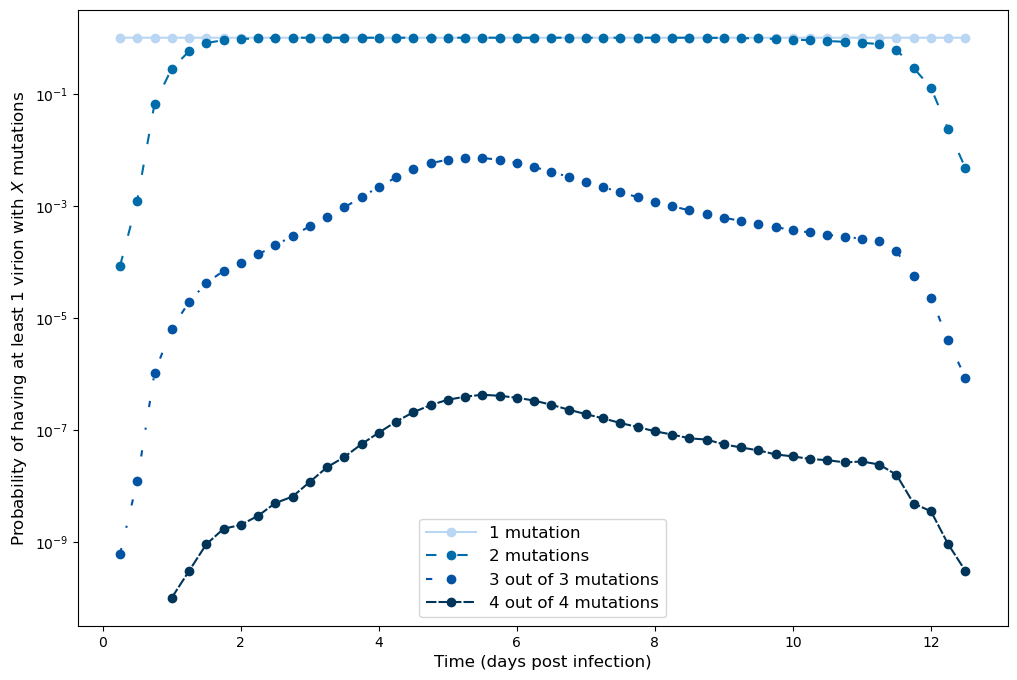

In [27]:
from decimal import *

#We calculate the totals of each type of virion
n_totals = np.zeros((6,53))
for i in range(0,1000):
    for j in range(0,6):
        n_totals[j,0:len(n_i_lists_quick[i][j])] += n_i_lists_quick[i][j]
N_TOTAL = np.sum(n_totals, axis = 0)

#set up time values
timevals = np.linspace(0,13,53)

#set up the colors for the plot
plotcolors = ['#B9D6F2', '#006DAA', '#0353A4', '#003559','#061A40']
linestyles = ['solid',(0,(5,10)),(0,(3,10,1,10)),(0,(5,1)),(0, (3, 1, 1, 1, 1, 1))]

fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(8)

for i in range(1,6):
    #make an estimate for the probability
    
    prop = (n_totals[i,:] / N_TOTAL)
    myrange = np.where((prop)>0)

    mynewprop = []
    mynewNTOTAL = []
    result = []


    for k in range(len(myrange[0])):
        mynewprop.append(1 - Decimal(float(prop[myrange[0][k]])))
        mynewNTOTAL.append(Decimal(N_TOTAL[myrange[0][k]] / (1000 * numberpeople1000s_quick)))
        result.append(1 - mynewprop[-1] ** mynewNTOTAL[-1])


    #create our label
    if i > 2:
        mylabel = str(i) + " out of " + str(i) + " mutations"
    else:
        if i > 1:
            mylabel = "2 mutations"
        else:
            mylabel = "1 mutation"

    if len(myrange[0]) > 0:
        ax.semilogy(timevals[myrange], result, linestyle=linestyles[i-1],color=plotcolors[i-1],marker='o', label = mylabel)


ax.legend(fontsize=12,loc='lower center',handlelength=3)
ax.set_ylabel(r'Probability of having at least 1 virion with $X$ mutations',fontsize=12)
ax.set_xlabel('Time (days post infection)',fontsize=12)
plt.savefig('Plots/prob_quick_1_lower_mort.pdf', dpi=2400,bbox_inches='tight')
plt.show()